# Proje 1 - Pandas ile Veri Analizi
* Aşağıda belirtilen soruların cevaplarını, ilgili boş hücrelere yazınız ve adı öğrenci numaranızdan oluşan nihai Jupyter Notebook (.ipynb) dosyasını, __09.06.2021 Çarşamba saat 18:00'e kadar__ EgeDers web sitesinde ilgili ders sayfasını kullanarak sisteme yükleyiniz. 
* Herhangi bir sorunuz olursa, EgeDers web sitesindeki ilgili ders sayfasında bu proje ile ilgili açılan forumu kullanınız.
* Çözümlerinizde döngüler yerine ```pandas``` kütüphanesinin kullanılması gerekmektedir.
* DataFrame'in gerekli sütunlarını elde edebilmek için (örn: anketteki 7. soru ile ilgili tüm sütunlar) "```filter```" metodunu kullanmanız önerilir.
* Çözümler arasında belirli bir oranın üstünde benzerlik tespit edildiğinde, bu çözümlerin notunda aynı oranda kesinti yapılacaktır veya bu çözümler sıfır alacaktır.

## Soru 1:
* Kaggle'in 2020 yılı için üyeleriyle yaptığı anket sonuçlarını içeren ekteki "kaggle_survey_2020_responses.csv" dosyasını 2. satırı atlayarak ```survey``` adlı DataFrame'e okuyun.
* İlk sütunu silin.
* Q1, Q2, Q3, Q4, Q5 ve Q6 sütun isimlerini sırasıyla Age, Gender, Country, Education, Occupation ve Coding Experience olacak şekilde değiştirin.
* Education, Occupation ve Coding Experience sütunlarından herhangi birisisinde ```NaN``` değeri olan satırları siliniz. Kaç satır silindi?
* En son oluşan DataFrame'in satır ve sütun sayısını yazdırın.

In [1]:
import pandas as pd
survey = pd.read_csv("kaggle_survey_2020_responses.csv",skiprows=[1]) #2. satırı atlayarak veri okuma
survey=survey.drop('Time from Start to Finish (seconds)',1) #Time from Start to Finish (seconds) silinsin
survey.rename(columns= {'Q1':'Age', 'Q2':'Gender','Q3':'Country','Q4':'Education','Q5':'Occupation','Q6':'Coding Experience'},
              inplace = True) #Sütun isimleri değiştirilsin
silinmeden_once_satir=survey.shape[0]
survey=survey.dropna(subset=['Education', 'Occupation','Coding Experience']) #sütunlardaki nan değerleri silinsin
silindikten_sonra_satir=survey.shape[0]
survey=survey.reset_index(drop=True) #indeksleri düzeltelim
print("Silinen satır= ",silinmeden_once_satir-silindikten_sonra_satir)
print("Son durumda satir ve sütun:",survey.shape)
survey

Silinen satır=  916
Son durumda satir ve sütun: (19120, 354)


,Age,Gender,Country,Education,Occupation,Coding Experience,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,C,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
1,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19115,35-39,Man,Thailand,Bachelor’s degree,Other,10-20 years,NaN,NaN,SQL,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
19116,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
19117,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19118,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,C,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


## Soru 2:
Ankete katılanların yaş aralık dağılımını pasta grafiği ile gösteriniz.

<AxesSubplot:ylabel='Age'>

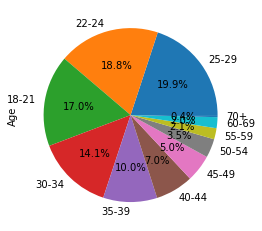

In [2]:
##NaN veriler silinmiş Dataframeden devam edildi.
survey.Age.value_counts().plot(kind='pie',autopct='%1.1f%%')

## Soru 3:
Türkiye'den ankete katılanların eğitim seviyelerine göre sayılarını listeleyiniz.

In [3]:
Türkiye_Survey=survey[survey['Country']=='Turkey']
Türkiye_Survey.Education.value_counts()

Bachelor’s degree                                                    129
Master’s degree                                                      111
Doctoral degree                                                       50
Some college/university study without earning a bachelor’s degree     15
I prefer not to answer                                                 8
Professional degree                                                    6
No formal education past high school                                   3
Name: Education, dtype: int64

## Soru 4:
Her bir yaş aralığı için en çok yapılan meslek ismini (```Occupation```) listeleyiniz.

In [4]:
survey.Occupation.groupby(survey['Age']).agg(lambda x:x.value_counts().index[0])

Age
18-21           Student
22-24           Student
25-29           Student
30-34    Data Scientist
35-39    Data Scientist
40-44    Data Scientist
45-49             Other
50-54             Other
55-59             Other
60-69             Other
70+      Data Scientist
Name: Occupation, dtype: object

## Soru 5:
* Her bir programlama dilinin kaç anket katılımcısı tarafından kullanıldığını bulup büyükten küçüğe sıralayınız.
* Her bir programlama dilinin kaç ```Data Scientist``` tarafından kullanıldığını bulup büyükten küçüğe sıralayınız. 
* Her iki sonucu aynı figürde yan yana iki alt grafik (subplot) olarak gösteriniz. Grafiklere uygun birer başlık (```title```) atayınız.

In [5]:
selected_columns=['Q7_Part_1','Q7_Part_2','Q7_Part_3','Q7_Part_4','Q7_Part_5','Q7_Part_6','Q7_Part_7','Q7_Part_8','Q7_Part_9',
                  'Q7_Part_10','Q7_Part_11','Q7_Part_12','Q7_OTHER']
statistics=survey[selected_columns].copy()
statistics=statistics.rename(columns={'Q7_Part_1':'Python','Q7_Part_2':'R','Q7_Part_3':'SQL','Q7_Part_4':'C','Q7_Part_5':'C++',
'Q7_Part_6':'Java','Q7_Part_7':'JavaScript','Q7_Part_8':'Julia','Q7_Part_9':'Swift',
                  'Q7_Part_10':'Bash','Q7_Part_11':'MATLAB','Q7_Part_12':'None','Q7_OTHER':'Other'})
pl_statistics=statistics.count().sort_values(ascending=False)
pl_statistics


Python        15530
SQL            7535
R              4277
C++            3827
Java           3367
C              3315
JavaScript     2995
MATLAB         2217
Other          1945
Bash           1776
Julia           262
None            206
Swift           198
dtype: int64

In [6]:
ds_data=survey[survey['Occupation']=='Data Scientist']
ds_statistics=ds_data[selected_columns].copy()
ds_statistics=ds_statistics.rename(columns={'Q7_Part_1':'Python','Q7_Part_2':'R','Q7_Part_3':'SQL','Q7_Part_4':'C','Q7_Part_5':'C++',
'Q7_Part_6':'Java','Q7_Part_7':'JavaScript','Q7_Part_8':'Julia','Q7_Part_9':'Swift',
                  'Q7_Part_10':'Bash','Q7_Part_11':'MATLAB','Q7_Part_12':'None','Q7_OTHER':'Other'})
ds_statistics=ds_statistics.count().sort_values(ascending=False)
ds_statistics


Python        2453
SQL           1473
R              975
Bash           405
C++            323
Java           305
JavaScript     290
C              247
Other          245
MATLAB         242
Julia           71
Swift           14
None             5
dtype: int64

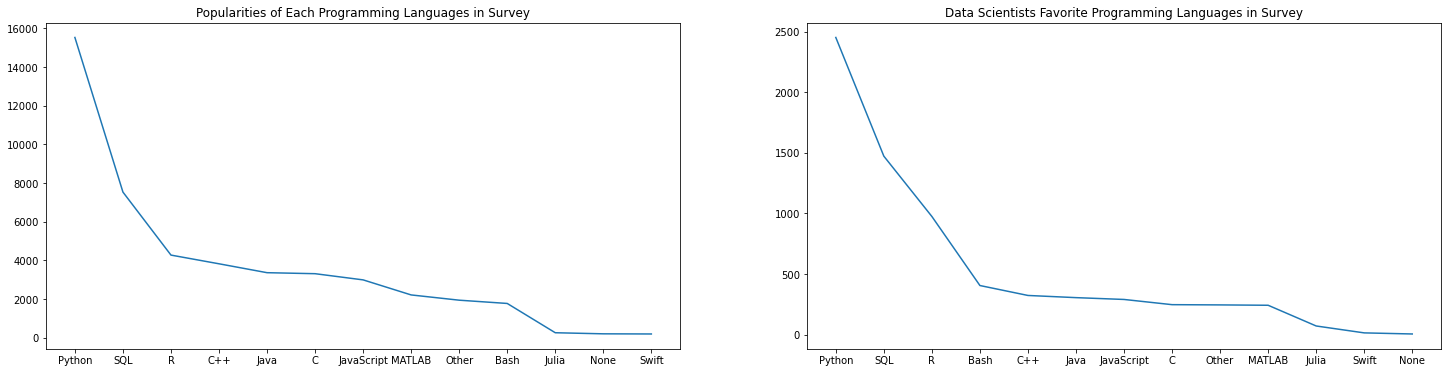

In [7]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,6))
ax1=fig.add_subplot(1,2,1)
plt.plot(pl_statistics)
ax2=fig.add_subplot(1,2,2)
ax1.title.set_text('Popularities of Each Programming Languages in Survey')
ax2.title.set_text('Data Scientists Favorite Programming Languages in Survey')
plt.plot(ds_statistics)
plt.show()

# Soru 6:
Yatay eksende kodlama deneyimi, dikey eksende makine öğrenmesi metotlarını kullanan ```Data Scientist``` sayısı olacak şekilde bir sütun grafiği çiziniz.

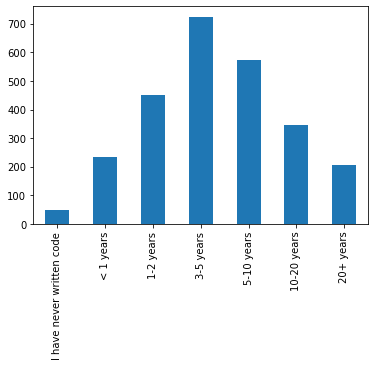

In [8]:
ds_data=ds_data[ds_data['Q16_Part_15']!='None']#Kullanmayanları silelim
ds_statistics=ds_data['Coding Experience'].value_counts()
reorder_list=['I have never written code','< 1 years','1-2 years','3-5 years','5-10 years','10-20 years','20+ years']
ds_statistics=ds_statistics.reindex(reorder_list)
ds_statistics.plot(x='Coding Experience',y=ds_statistics,kind='bar')
plt.show()

## Soru 7:
* Yalnızca scikit-learn framework'ünü kullananların kullandıkları makine öğrenmesi algoritmalarının kullanıcı sayılarını büyükten küçüğe listeleyiniz.
* Scikit-learn, tensorflow ve keras kütüphanelerini düzenli olarak kullanan kişi sayısı kaçtır?

In [9]:
scikit_users=survey.dropna(subset=['Q16_Part_1'])
scikit_users=scikit_users[scikit_users.Q16_Part_2.isnull() & scikit_users.Q16_Part_3.isnull() & scikit_users.Q16_Part_4.isnull()
                         & scikit_users.Q16_Part_5.isnull() & scikit_users.Q16_Part_6.isnull() & scikit_users.Q16_Part_7.isnull()
                         & scikit_users.Q16_Part_8.isnull() & scikit_users.Q16_Part_9.isnull() &scikit_users.Q16_Part_10.isnull()
                         & scikit_users.Q16_Part_11.isnull() & scikit_users.Q16_Part_12.isnull() & scikit_users.Q16_Part_13.isnull()
                         & scikit_users.Q16_Part_14.isnull() & scikit_users.Q16_Part_15.isnull()& scikit_users.Q16_OTHER.isnull()]
scikit_machine_learning_algorithms=scikit_users.filter(['Q17_Part_1','Q17_Part_2','Q17_Part_3','Q17_Part_4','Q17_Part_5','Q17_Part_6','Q17_Part_7',
                    'Q17_Part_8','Q17_Part_9','Q17_Part_10','Q17_Part_11','Q17_OTHER'])
scikit_machine_learning_algorithms=scikit_machine_learning_algorithms.rename(
    columns={'Q17_Part_1':'Linear or Logistic Regression','Q17_Part_2':'Decision Trees or Random Forests',
'Q17_Part_3':'Gradient Boosting Machines','Q17_Part_4':'Bayesian Approaches','Q17_Part_5':'Evolutionary Approaches',
'Q17_Part_6':'Dense Neural Networks','Q17_Part_7':'Convolutional Neural Networks','Q17_Part_8':'Generative Adversarial Networks',
'Q17_Part_9':'Recurrent Neural Networks','Q17_Part_10':'Transformer Networks','Q17_Part_11':'None', 'Q17_OTHER':'Other'})
scikit_machine_learning_algorithms.count().sort_values(ascending=False)

Linear or Logistic Regression       1683
Decision Trees or Random Forests    1292
Bayesian Approaches                  428
Gradient Boosting Machines           295
Convolutional Neural Networks        138
None                                 105
Dense Neural Networks                 68
Recurrent Neural Networks             67
Other                                 60
Evolutionary Approaches               38
Transformer Networks                  20
Generative Adversarial Networks        8
dtype: int64

In [10]:
selected_libraries=survey.filter(['Q16_Part_1','Q16_Part_2','Q16_Part_3'])
selected_libraries=selected_libraries.rename(columns={'Q16_Part_1':'Scikit-learn','Q16_Part_2':'Tensorflow','Q16_Part_3':'Keras'})
selected_libraries.count()

Scikit-learn    10250
Tensorflow       6934
Keras            6192
dtype: int64

## Soru 8:
* Ortalama yıllık maaşı en yüksek olan meslek (```Occupation```) nedir? ```Data Scientist``` kaçıncı sıradadır? **Not:** Aralık olarak verilen maaşların orta noktasını maaş değeri olarak alıp ```ConvertedComp``` isimli yeni bir sütun ekleyiniz.
* ```Data Scientist``` olarak çalışanların ülke bazında ortalama yıllık maaşlarını büyükten küçüğe sıralayın, ilk 10 ülkeyi ve bu ülkelerdeki ortalama yıllık ```Data Scientist``` maaşlarını listeleyin.
* 250’den fazla kişi çalışan kurumdakilerin ortalama maaşları ne kadardır?
* Hesaplanan maaş (```ConvertedComp```) sütununu kullanarak ülke bazlı ortalama, standart sapma ve medyan değerlerinden oluşan bir dataframe oluşturun ve listeleyin. Türkiye kaçıncı sıradadır ve değeri kaçtır?

In [11]:
deneme=survey.filter(['Country','Education','Coding Experience','Occupation','Q20','Q24'])
deneme=deneme.dropna(subset=['Q24'])
deneme=deneme.reset_index(drop=True)
deneme.loc[deneme['Q24']=='$0-999', 'ConvertedComp'] = 500
deneme.loc[deneme['Q24']=='1,000-1,999', 'ConvertedComp'] = 1500
deneme.loc[deneme['Q24']=='2,000-2,999', 'ConvertedComp'] = 2500
deneme.loc[deneme['Q24']=='3,000-3,999', 'ConvertedComp'] = 3500
deneme.loc[deneme['Q24']=='4,000-4,999', 'ConvertedComp'] = 4500
deneme.loc[deneme['Q24']=='5,000-7,499', 'ConvertedComp'] = 6250
deneme.loc[deneme['Q24']=='7,500-9,999', 'ConvertedComp'] = 8750
deneme.loc[deneme['Q24']=='10,000-14,999', 'ConvertedComp'] = 12500
deneme.loc[deneme['Q24']=='15,000-19,999', 'ConvertedComp'] = 17500
deneme.loc[deneme['Q24']=='20,000-24,999', 'ConvertedComp'] = 22500
deneme.loc[deneme['Q24']=='25,000-29,999', 'ConvertedComp'] = 27500
deneme.loc[deneme['Q24']=='30,000-39,999', 'ConvertedComp'] = 35000
deneme.loc[deneme['Q24']=='40,000-49,999', 'ConvertedComp'] = 45000
deneme.loc[deneme['Q24']=='50,000-59,999', 'ConvertedComp'] = 55000
deneme.loc[deneme['Q24']=='60,000-69,999', 'ConvertedComp'] = 65000
deneme.loc[deneme['Q24']=='70,000-79,999', 'ConvertedComp'] = 75000
deneme.loc[deneme['Q24']=='80,000-89,999', 'ConvertedComp'] = 85000
deneme.loc[deneme['Q24']=='90,000-99,999', 'ConvertedComp'] = 95000
deneme.loc[deneme['Q24']=='100,000-124,999', 'ConvertedComp'] = 112500
deneme.loc[deneme['Q24']=='125,000-149,999', 'ConvertedComp'] = 137500
deneme.loc[deneme['Q24']=='150,000-199,999', 'ConvertedComp'] = 175000
deneme.loc[deneme['Q24']=='200,000-249,999', 'ConvertedComp'] = 225000
deneme.loc[deneme['Q24']=='250,000-299,999', 'ConvertedComp'] = 275000
deneme.loc[deneme['Q24']=='300,000-500,000', 'ConvertedComp'] = 400000
deneme.loc[deneme['Q24']=='> $500,000', 'ConvertedComp'] = 500000
ds_sıra=deneme.ConvertedComp.groupby(deneme['Occupation']).mean().sort_values(ascending=False)
deneme.ConvertedComp.groupby(deneme['Occupation']).mean().sort_values(ascending=False).head(1)

Occupation
Product/Project Manager    62362.711864
Name: ConvertedComp, dtype: float64

In [12]:
ds_sıralama=ds_sıra.to_frame().reset_index()
print("Data Scientist sırası=",ds_sıralama[ds_sıralama['Occupation']=='Data Scientist'].index+1)

Data Scientist sırası= Int64Index([2], dtype='int64')


In [13]:
data_scientists=deneme[deneme['Occupation']=='Data Scientist']
data_scientists.ConvertedComp.groupby(deneme['Country']).mean().sort_values(ascending=False).head(10)

Country
United States of America                                142609.806630
Israel                                                  111980.000000
Switzerland                                             109230.769231
Australia                                               104319.444444
United Kingdom of Great Britain and Northern Ireland     89750.000000
Germany                                                  79804.687500
Ireland                                                  78500.000000
Singapore                                                76937.500000
Canada                                                   74466.981132
Thailand                                                 73708.333333
Name: ConvertedComp, dtype: float64

In [14]:
calısan_fazla_250=deneme[(deneme['Q20']=='250-999 employees')|(deneme['Q20']=='1000-9,999 employees')|(deneme['Q20']=='10,000 or more employees')]
calısan_fazla_250.ConvertedComp.mean()

56411.32254995243

In [15]:
Turkey_dataframe=deneme.groupby('Country').describe()
Turkey_dataframe=Turkey_dataframe.sort_values([('ConvertedComp', 'mean')], ascending=False).reset_index()
print("Türkiye sırası =",Turkey_dataframe[Turkey_dataframe['Country']=='Turkey'].index+1)

Türkiye sırası = Int64Index([40], dtype='int64')


# Soru 9:
Lisans, yüksek lisans ve doktora mezunlarına ilişkin (ayrı ayrı); yatay eksende kodlama deneyimi (artan sırada olmalıdır), dikey eksende ortalama maaş bilgisi olacak şekilde tek bir çizgi grafiği çiziniz.

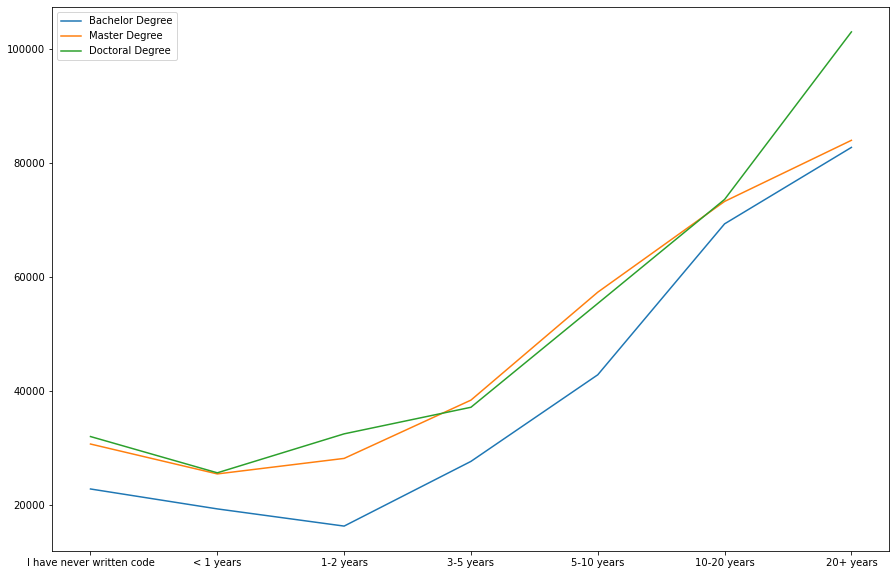

In [16]:
reorder_list=['I have never written code','< 1 years','1-2 years','3-5 years','5-10 years','10-20 years','20+ years']
bachelor_maas_by_code_experience=deneme[deneme['Education']=="Bachelor’s degree"]
bachelor_maas_by_code_experience=bachelor_maas_by_code_experience.groupby('Coding Experience').mean().reindex(reorder_list)
master_maas_by_code_experience=deneme[deneme['Education']=="Master’s degree"]
master_maas_by_code_experience=master_maas_by_code_experience.groupby('Coding Experience').mean().reindex(reorder_list)
phd_maas_by_code_experience=deneme[deneme['Education']=="Doctoral degree"]
phd_maas_by_code_experience=phd_maas_by_code_experience.groupby('Coding Experience').mean().reindex(reorder_list)
plt.figure(figsize=(15, 10))
plt.plot(bachelor_maas_by_code_experience,label='Bachelor Degree')
plt.plot(master_maas_by_code_experience,label="Master Degree")
plt.plot(phd_maas_by_code_experience,label='Doctoral Degree')
plt.legend()


## Soru 10:
* Mesleklerdeki (```Occupation```) cinsiyet dağılımını, yatay yığılmış "stacked" sütun grafik olarak gösteriniz.
* Her meslek (```Occupation```) için kadın oranını bulup büyükten küçüğe sıralayınız.
* Şu anda çalışmayan kadın ve erkek oranlarını listeleyiniz.

<AxesSubplot:ylabel='Occupation'>

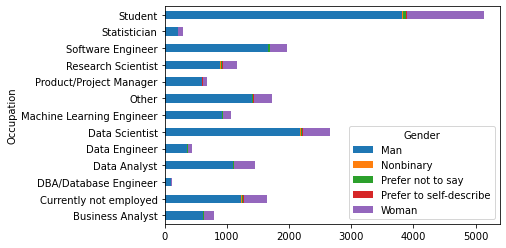

In [17]:
survey.groupby(['Occupation', 'Gender']).size().unstack().fillna(0).plot(kind='barh', stacked=True)

In [18]:
woman_percentage=survey[survey['Gender']=='Woman']
woman_statistics=woman_percentage.Occupation.value_counts()/survey.Occupation.value_counts()
woman_statistics.sort_values(ascending=False)

Student                      0.240296
Statistician                 0.236934
Data Analyst                 0.235415
Currently not employed       0.226748
Research Scientist           0.203085
Business Analyst             0.193384
Other                        0.168023
Data Scientist               0.164347
Data Engineer                0.138889
Software Engineer            0.132721
DBA/Database Engineer        0.128000
Machine Learning Engineer    0.126168
Product/Project Manager      0.113703
Name: Occupation, dtype: float64

In [19]:
not_employed=survey[survey['Occupation']=='Currently not employed']
not_employed=not_employed[(not_employed['Gender']=='Man')|(not_employed['Gender']=='Woman')]
man_woman=survey[(survey['Gender']=='Man')|(survey['Gender']=='Woman')]
not_employed['Gender'].value_counts()/man_woman['Gender'].value_counts()

Man      0.081529
Woman    0.101359
Name: Gender, dtype: float64

## Soru 11:

Ankete katılan kadınlardan ortalama çalışma süresi 3 yılın üzerinde olanlar için:
* Kadın katılımcı sayısının en yüksek olduğu ülke hangisidir?
* Türkiye'den ankete katılan kadınların eğitim durumlarını pasta grafiğinde gösteriniz.

In [20]:
woman_survey=survey[survey['Gender']=='Woman']
woman_survey=woman_survey[(woman_survey['Coding Experience']=='3-5 years')|(woman_survey['Coding Experience']=='5-10 years')|(woman_survey['Coding Experience']=='10-20 years')|(woman_survey['Coding Experience']=='20+ years')]
woman_survey_mode=woman_survey.filter(['Country'])
display(woman_survey_mode.mode())

,Country
0,India


<AxesSubplot:ylabel='Education'>

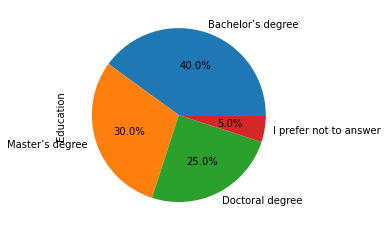

In [21]:
Turkish_women=woman_survey[(woman_survey['Country']=='Turkey')]
Turkish_women.Education.value_counts().plot(kind='pie',autopct='%1.1f%%')

## Soru 12:
* 39. soru ile ilgili sütunlarda yer alan değerlerdeki parantez içi ifadeleri siliniz.
* 18-21 yaş aralığında olan katılımcıların favori sosyal medya platformu nedir?

In [22]:
social_media=survey.filter(['Age','Q39_Part_1','Q39_Part_2','Q39_Part_3','Q39_Part_4','Q39_Part_5','Q39_Part_6','Q39_Part_7','Q39_Part_8',
               'Q39_Part_9','Q39_Part_10','Q39_Part_11','Q39_OTHER'])
social_media['Q39_Part_1'] = social_media['Q39_Part_1'].str.replace(r"\(.*\)","")
social_media['Q39_Part_2'] = social_media['Q39_Part_2'].str.replace(r"\(.*\)","")
social_media['Q39_Part_3'] = social_media['Q39_Part_3'].str.replace(r"\(.*\)","")
social_media['Q39_Part_4'] = social_media['Q39_Part_4'].str.replace(r"\(.*\)","")
social_media['Q39_Part_5'] = social_media['Q39_Part_5'].str.replace(r"\(.*\)","")
social_media['Q39_Part_6'] = social_media['Q39_Part_6'].str.replace(r"\(.*\)","")
social_media['Q39_Part_7'] = social_media['Q39_Part_7'].str.replace(r"\(.*\)","")
social_media['Q39_Part_8'] = social_media['Q39_Part_8'].str.replace(r"\(.*\)","")
social_media['Q39_Part_9'] = social_media['Q39_Part_9'].str.replace(r"\(.*\)","")
social_media['Q39_Part_10'] = social_media['Q39_Part_10'].str.replace(r"\(.*\)","")
social_media['Q39_Part_11'] = social_media['Q39_Part_11'].str.replace(r"\(.*\)","")
social_media['Q39_OTHER'] = social_media['Q39_OTHER'].str.replace(r"\(.*\)","")
social_media

<ipython-input-22-9558191de7c1>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  social_media['Q39_Part_1'] = social_media['Q39_Part_1'].str.replace(r"\(.*\)","")
<ipython-input-22-9558191de7c1>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  social_media['Q39_Part_2'] = social_media['Q39_Part_2'].str.replace(r"\(.*\)","")
<ipython-input-22-9558191de7c1>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  social_media['Q39_Part_3'] = social_media['Q39_Part_3'].str.replace(r"\(.*\)","")
<ipython-input-22-9558191de7c1>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  social_media['Q39_Part_4'] = social_media['Q39_Part_4'].str.replace(r"\(.*\)","")
<ipython-input-22-9558191de7c1>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  social_media['Q39

,Age,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_Part_10,Q39_Part_11,Q39_OTHER
0,35-39,NaN,NaN,NaN,Kaggle,NaN,NaN,NaN,NaN,Journal Publications,NaN,NaN,NaN
1,30-34,Twitter,NaN,Reddit,Kaggle,Course Forums,YouTube,NaN,Blogs,NaN,Slack Communities,NaN,NaN
2,35-39,NaN,Email newsletters,NaN,Kaggle,NaN,YouTube,NaN,NaN,NaN,NaN,NaN,NaN
3,30-34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,30-34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19115,35-39,NaN,NaN,NaN,NaN,NaN,YouTube,NaN,NaN,NaN,NaN,NaN,NaN
19116,55-59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
19117,30-34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19118,22-24,Twitter,NaN,NaN,Kaggle,NaN,YouTube,NaN,Blogs,NaN,NaN,NaN,NaN


In [23]:
social_media=social_media[social_media['Age']=='18-21']
social_media=social_media.filter(['Q39_Part_1','Q39_Part_2','Q39_Part_3','Q39_Part_4','Q39_Part_5','Q39_Part_6','Q39_Part_7','Q39_Part_8',
               'Q39_Part_9','Q39_Part_10','Q39_Part_11','Q39_OTHER'])
social_media=social_media.rename(columns={'Q39_Part_1':'Twitter','Q39_Part_2':'Email newsletters','Q39_Part_3':'Reddit ','Q39_Part_4':'Kaggle','Q39_Part_5':'Course Forums',
'Q39_Part_6':'YouTube','Q39_Part_7':'Podcast','Q39_Part_8':'Blogs','Q39_Part_9':'Journal Publications',
                  'Q39_Part_10':'Slack Communities','Q39_Part_11':'None','Q39_OTHER':'Other'})
social_media.count().sort_values(ascending=False).head(1)

Kaggle    1062
dtype: int64

## Soru 13:
* https://download.geonames.org/export/dump/countryInfo.txt adresindeki veriyi:
    * ilk 49 satırını ihmal ederek
    * yalnızca ```#ISO, Country, neighbours``` sütunlarını kullanarak 
    * ```Country``` sütununu indeks sütun olarak  
    
okuyarak __country_info__ adlı DataFrame'e aktarınız.
* ```#ISO``` sütununun ismini ```Country Code``` olarak değiştiriniz.
* ```survey``` ve ```country_info``` adlı DataFrame'leri ülke bazında birleştirip ```merged_survey``` adında yeni bir dataframe'e aktarınız.

In [24]:
country_info = pd.read_table("countryInfo.txt",skiprows=[i for i in range(0, 49)])
country_info=country_info.filter(['#ISO', 'Country', 'neighbours'])
country_info.set_index('Country',inplace=True)
country_info=country_info.rename(columns={'#ISO':'Country Code'})
merged_survey = pd.merge(country_info, survey, on=['Country'],how='right')
merged_survey

,Country,Country Code,neighbours,Age,Gender,Education,Occupation,Coding Experience,Q7_Part_1,Q7_Part_2,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Colombia,CO,"EC,PE,PA,BR,VE",35-39,Man,Doctoral degree,Student,5-10 years,Python,R,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
1,United States of America,NaN,NaN,30-34,Man,Master’s degree,Data Engineer,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,AR,"CL,BO,UY,PY,BR",35-39,Man,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,United States of America,NaN,NaN,30-34,Man,Master’s degree,Data Scientist,5-10 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Japan,JP,NaN,30-34,Man,Master’s degree,Software Engineer,3-5 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19115,Thailand,TH,"LA,MM,KH,MY",35-39,Man,Bachelor’s degree,Other,10-20 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
19116,United Kingdom of Great Britain and Northern I...,NaN,NaN,55-59,Woman,Master’s degree,Currently not employed,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
19117,Brazil,BR,"SR,PE,BO,UY,GY,PY,GF,VE,CO,AR",30-34,Man,Master’s degree,Research Scientist,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19118,India,IN,"CN,NP,MM,BT,PK,BD",22-24,Man,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


## Soru 14:
Almanya ve komşu ülkeleri için ankete katılanlardan doktoralıların ülke bazında yüzdelerini, ülke isimlerine göre alfabetik sırada listeleyiniz.

In [25]:
merged_survey=merged_survey[(merged_survey['Country Code']=='DE')|(merged_survey['Country Code']=='PL')|
(merged_survey['Country Code']=='NL')|(merged_survey['Country Code']=='BE')|(merged_survey['Country Code']=='FR')|
(merged_survey['Country Code']=='CH')] #Avusturya, Lüksemburg, Danimarka, Çekya ülkelerinden ankete katılım olmamış
filtered_merged_survey=merged_survey.filter(['Country','Education'])
phd_survey=filtered_merged_survey[filtered_merged_survey['Education']=='Doctoral degree']
phd_survey.Country.value_counts()/filtered_merged_survey.Country.value_counts().sort_index(ascending=False)

Belgium        0.220339
France         0.239617
Germany        0.258486
Netherlands    0.154362
Poland         0.151724
Switzerland    0.323529
Name: Country, dtype: float64